In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("C:\Main Storage\Documents\Works\Datasets\Vehicle Sales Data\Sales Data_Vehicles Trader.xlsx")
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Riza\AppData\Local\Temp\ipykernel_5584\1802654631.py:8: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_excel("C:\Main Storage\Documents\Works\Datasets\Vehicle Sales Data\Sales Data_Vehicles Trader.xlsx")


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 220.8+ KB


In [6]:
#Check typo
for col_name in ['STATUS', 'PRODUCTLINE', 'CITY', 'CUSTOMERNAME', 'DEALSIZE']:
  print(df[col_name].value_counts(),'\n')

STATUS
Shipped       2618
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64 

PRODUCTLINE
Classic Cars        967
Vintage Cars        608
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64 

CITY
Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
                 ... 
South Brisbane     15
Los Angeles        14
Munich             14
Burbank            13
Charleroi           8
Name: count, Length: 73, dtype: int64 

CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Auto-Moto Classics Inc.           8
Royale Belge                      8
Atelier graphique  

In [7]:
df['REVENUE'] = df['PRICEEACH'] * df['QUANTITYORDERED']

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00
...,...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium,4900.00
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small,1030.44
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium,3553.88
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small,482.13


In [8]:
df.groupby('PRODUCTLINE')['REVENUE'].agg(['max', 'min'])


,max,min
PRODUCTLINE,,
Classic Cars,9048.16,640.05
Motorcycles,6600.00,651.80
Planes,7543.75,875.91
Ships,5000.00,1089.36
Trains,5000.00,972.40
Trucks and Buses,7000.00,482.13
Vintage Cars,7600.00,541.14


In [10]:
total_product_line = df['QUANTITYORDERED'].sum()
print("\nTotal produk yang diorder:", total_product_line)


Total produk yang diorder: 99095


# SALES PERFORMANCE

## SALES PRODUCT LINES

In [12]:
product_order_totals = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False).reset_index()
product_order_totals

,PRODUCTLINE,QUANTITYORDERED
0,Classic Cars,33992
1,Vintage Cars,21097
2,Motorcycles,11663
3,Trucks and Buses,10777
4,Planes,10727
5,Ships,8127
6,Trains,2712


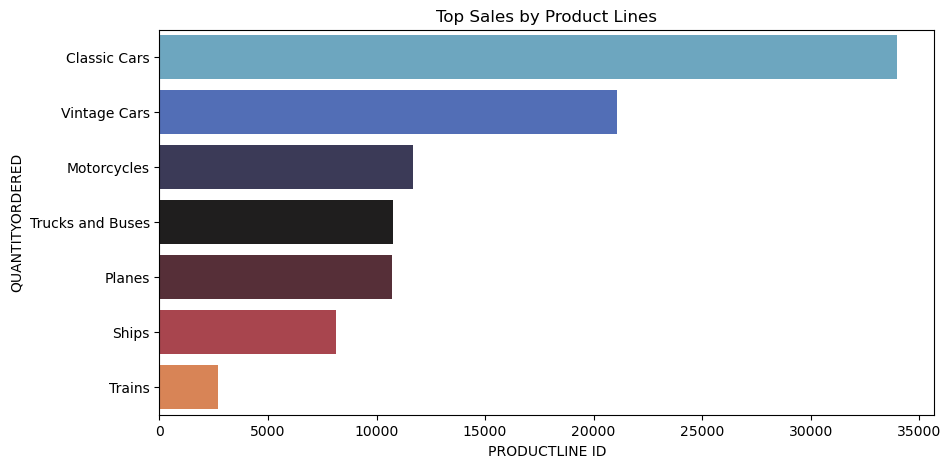

In [16]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=product_order_totals, y='PRODUCTLINE', x='QUANTITYORDERED', palette='icefire')
plt.title('Top Sales by Product Lines')
plt.xlabel('PRODUCTLINE ID')
plt.ylabel('QUANTITYORDERED')
plt.show()

## DEALSIZE

In [17]:
dealsize_totals = df.groupby('DEALSIZE')['QUANTITYORDERED'].sum().sort_values(ascending=False).reset_index()
dealsize_totals

,DEALSIZE,QUANTITYORDERED
0,Medium,52519
1,Small,39162
2,Large,7414


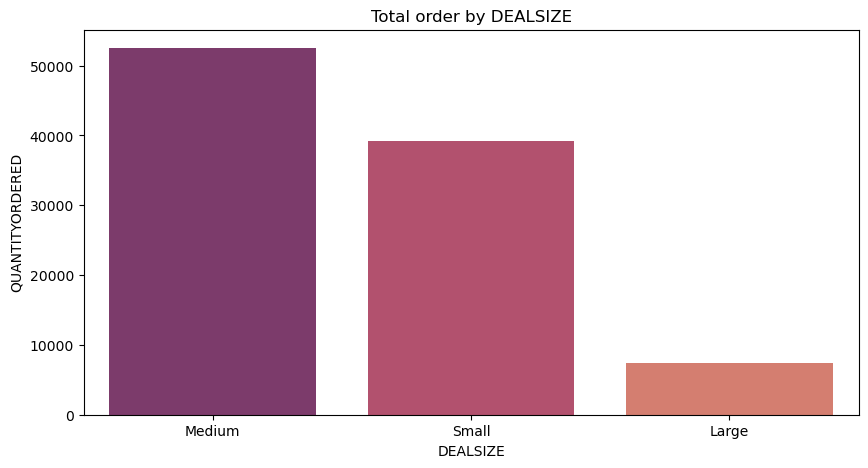

In [19]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=dealsize_totals, x='DEALSIZE', y='QUANTITYORDERED', palette='flare_r')
plt.title('Total order by DEALSIZE')
plt.xlabel('DEALSIZE')
plt.ylabel('QUANTITYORDERED')
plt.show()

(-1.0999999925707427,
 1.0999998694435043,
 -1.09999270583063,
 1.0999993533864911)

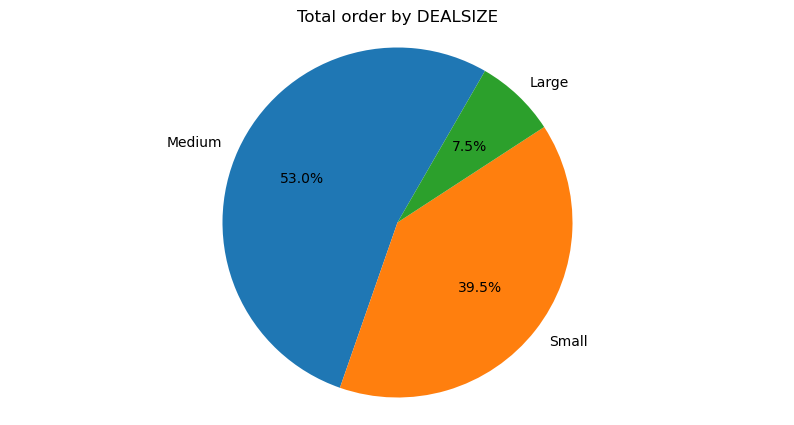

In [22]:
plt.pie(dealsize_totals['QUANTITYORDERED'], labels=dealsize_totals['DEALSIZE'], autopct= '%.1f%%', startangle=60)
plt.title('Total order by DEALSIZE')
plt.axis('equal')

Dealsize was very impactfull in increasing the quantity of orders as evidenced by 53% of customers using the DealSize medium when making transactions

Medium dealsize is the highest deals in transaction with 52.519 quantity ordered